In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('soil_dataset_25000.csv')

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics:")
display(df.describe())

Dataset shape: (25000, 19)

First few rows:


,Soil_Texture,Soil_Moisture_%,Bulk_Density_g_cm3,Porosity_%,Water_Holding_Capacity_%,pH_Level,Electrical_Conductivity_dS_m,Organic_Carbon_%,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Sulfur_mg_kg,Calcium_mg_kg,Magnesium_mg_kg,Temperature_C,Rainfall_mm,Humidity_%,Solar_Radiation_W_m2,Recommended_Crop
0,Clayey,7.00,1.45,44.57,28.35,5.75,0.22,2.93,226.84,47.02,389.79,14.74,1885.46,108.71,11.93,347.47,42.50,450.48,Corn
1,Clayey,35.28,1.37,47.82,12.91,5.04,0.74,2.00,306.11,22.03,309.09,25.86,650.34,232.80,28.76,410.55,59.84,186.23,Millets
2,Sandy,28.60,1.27,45.66,47.04,8.47,1.50,0.68,495.13,43.46,201.72,11.84,553.77,87.72,27.37,1337.41,79.60,116.50,Millets
3,Sandy,20.89,1.70,45.95,49.92,6.85,2.07,1.06,86.59,24.72,89.31,32.37,609.50,153.32,34.07,939.93,89.93,511.11,Millets
4,Sandy,16.07,1.78,34.40,32.54,8.20,1.59,2.43,152.29,34.81,316.74,11.59,127.23,463.39,20.66,888.06,30.66,136.95,Millets



Missing values per column:
Soil_Texture                    0
Soil_Moisture_%                 0
Bulk_Density_g_cm3              0
Porosity_%                      0
Water_Holding_Capacity_%        0
pH_Level                        0
Electrical_Conductivity_dS_m    0
Organic_Carbon_%                0
Nitrogen_mg_kg                  0
Phosphorus_mg_kg                0
Potassium_mg_kg                 0
Sulfur_mg_kg                    0
Calcium_mg_kg                   0
Magnesium_mg_kg                 0
Temperature_C                   0
Rainfall_mm                     0
Humidity_%                      0
Solar_Radiation_W_m2            0
Recommended_Crop                0
dtype: int64

Basic statistics:


,Soil_Moisture_%,Bulk_Density_g_cm3,Porosity_%,Water_Holding_Capacity_%,pH_Level,Electrical_Conductivity_dS_m,Organic_Carbon_%,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Sulfur_mg_kg,Calcium_mg_kg,Magnesium_mg_kg,Temperature_C,Rainfall_mm,Humidity_%,Solar_Radiation_W_m2
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,22.516651,1.450324,40.054956,29.988939,6.484443,1.298414,1.861079,275.023985,27.443614,224.957693,32.360426,1043.415574,273.679014,24.939511,852.810524,59.944528,447.774151
std,10.144591,0.202609,5.781835,11.580710,1.149839,0.696941,0.952020,129.454651,13.013560,100.422384,15.873683,548.601022,129.776068,8.678312,375.970282,17.333398,203.521850
min,5.000000,1.100000,30.000000,10.010000,4.500000,0.100000,0.200000,50.000000,5.010000,50.020000,5.000000,100.030000,50.020000,10.000000,200.070000,30.000000,100.010000
25%,13.710000,1.270000,35.060000,19.990000,5.490000,0.690000,1.040000,162.657500,16.120000,137.440000,18.577500,562.882500,161.557500,17.420000,528.585000,44.830000,270.117500
50%,22.560000,1.450000,40.160000,29.950000,6.460000,1.290000,1.860000,274.610000,27.465000,224.175000,32.230000,1042.940000,273.500000,24.970000,855.135000,60.060000,447.790000
75%,31.270000,1.630000,45.050000,40.030000,7.470000,1.910000,2.682500,387.702500,38.670000,312.150000,46.090000,1517.707500,385.535000,32.460000,1179.307500,74.960000,622.627500
max,40.000000,1.800000,50.000000,50.000000,8.500000,2.500000,3.500000,499.970000,50.000000,399.990000,60.000000,1999.930000,499.980000,40.000000,1499.940000,90.000000,799.990000


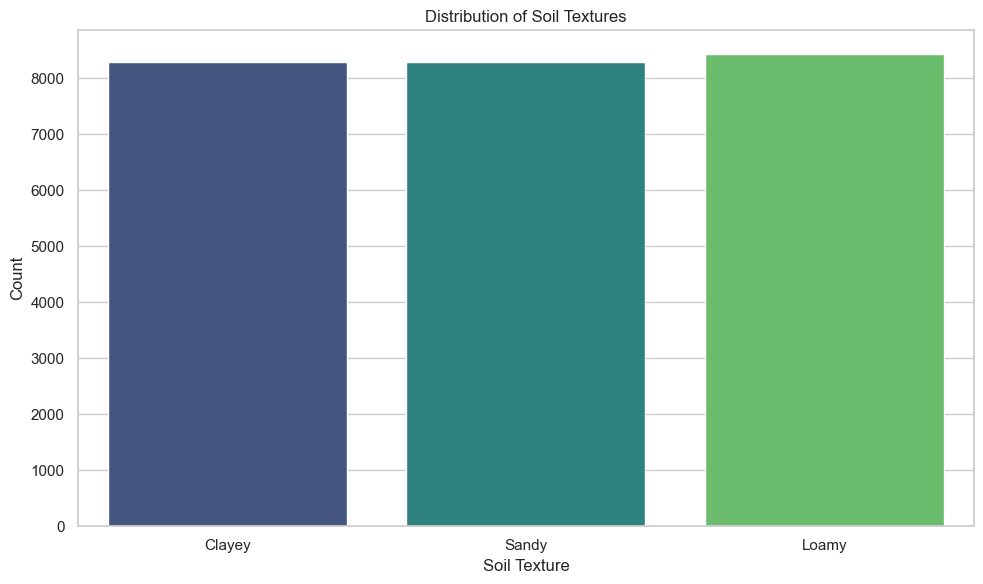

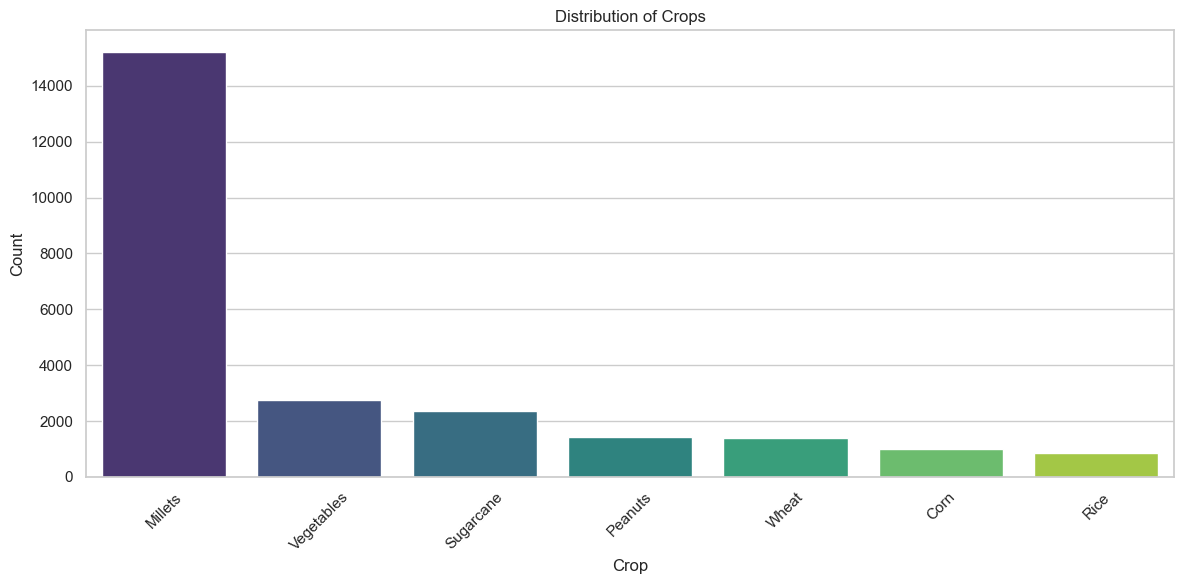

In [3]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Soil_Texture', data=df, palette='viridis')
plt.title('Distribution of Soil Textures')
plt.xlabel('Soil Texture')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
crop_counts = df.iloc[:, -1].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette='viridis')
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

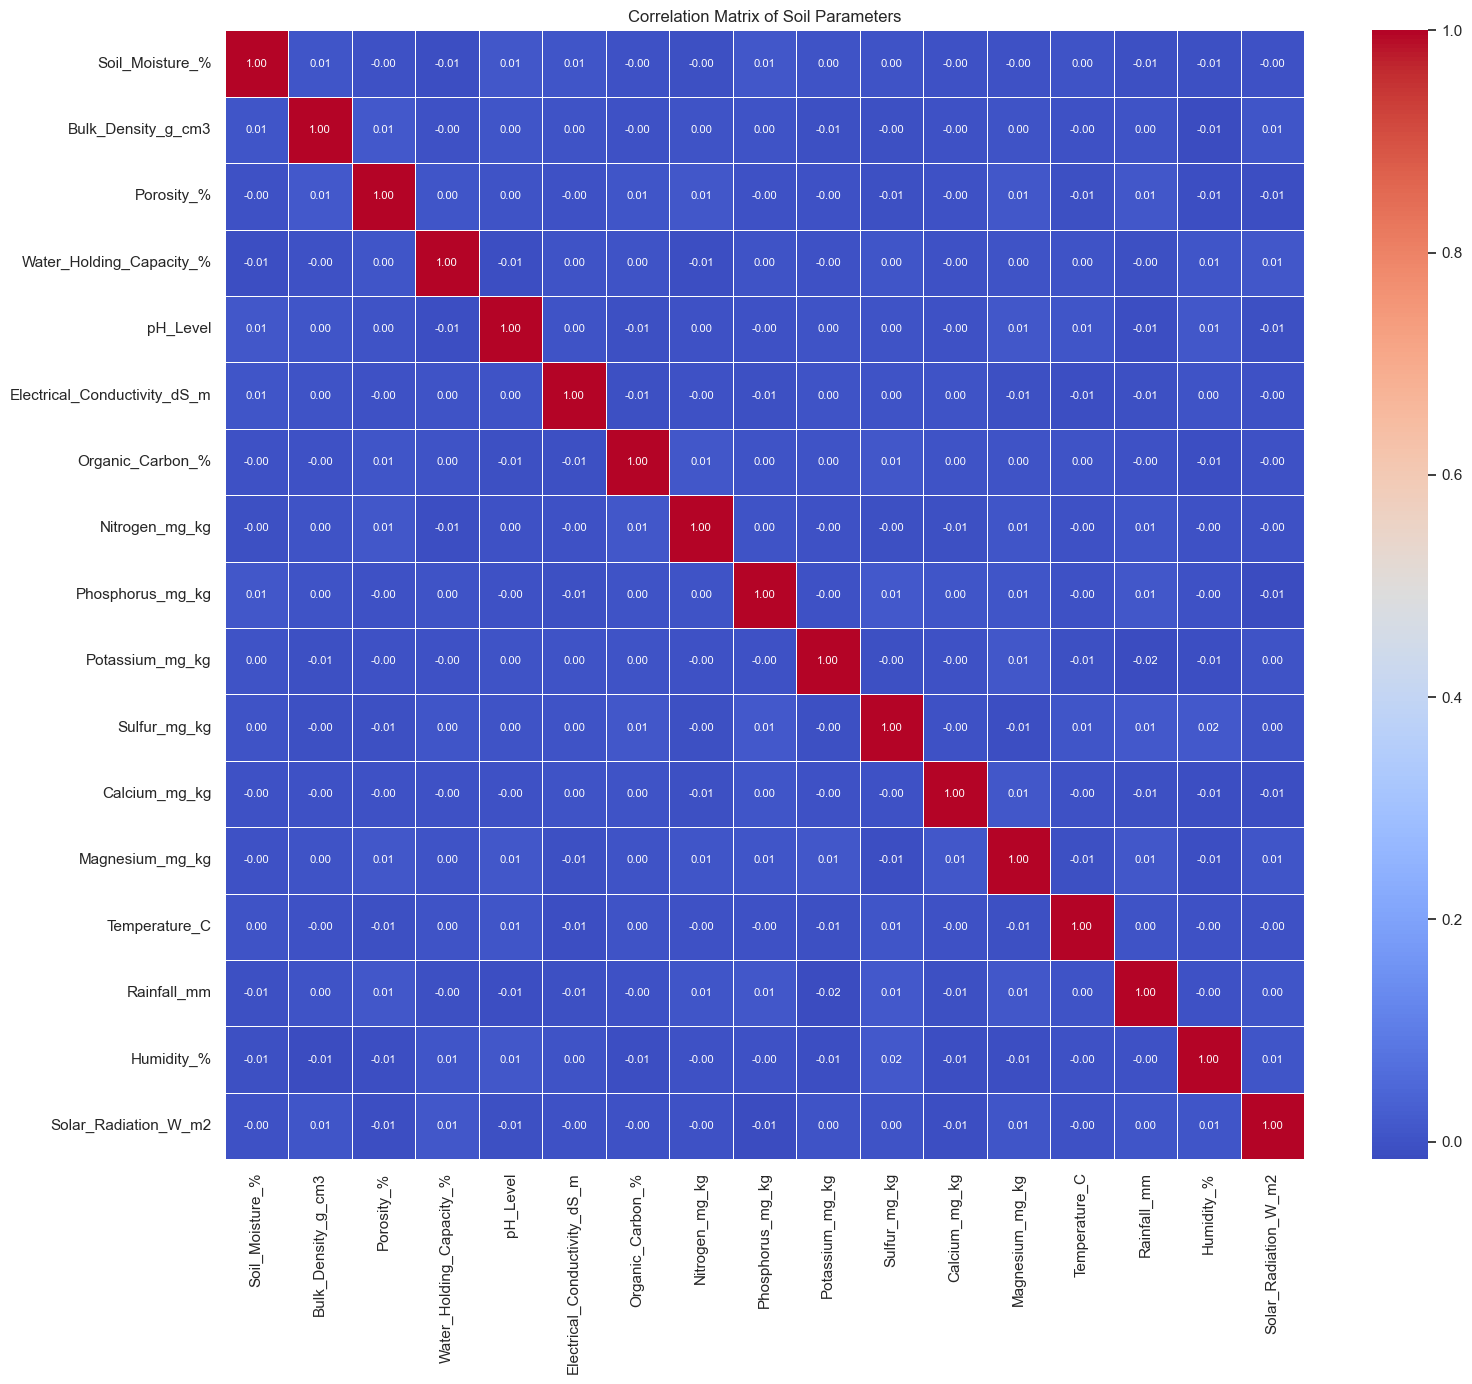

In [4]:
# Correlation analysis of numerical features
plt.figure(figsize=(16, 14))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Soil Parameters')
plt.tight_layout()
plt.show()

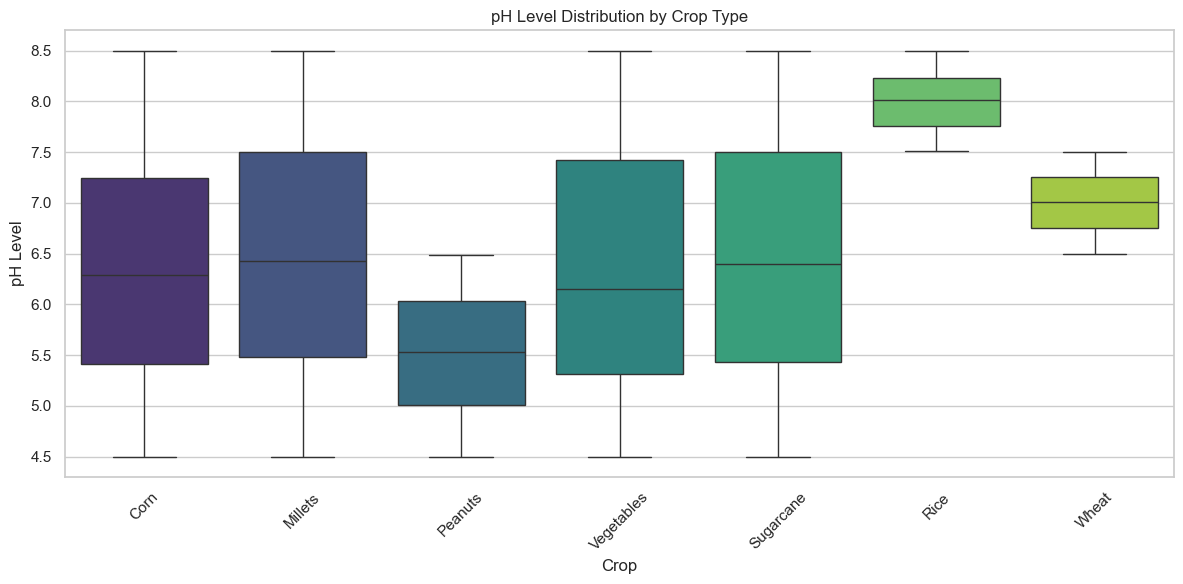

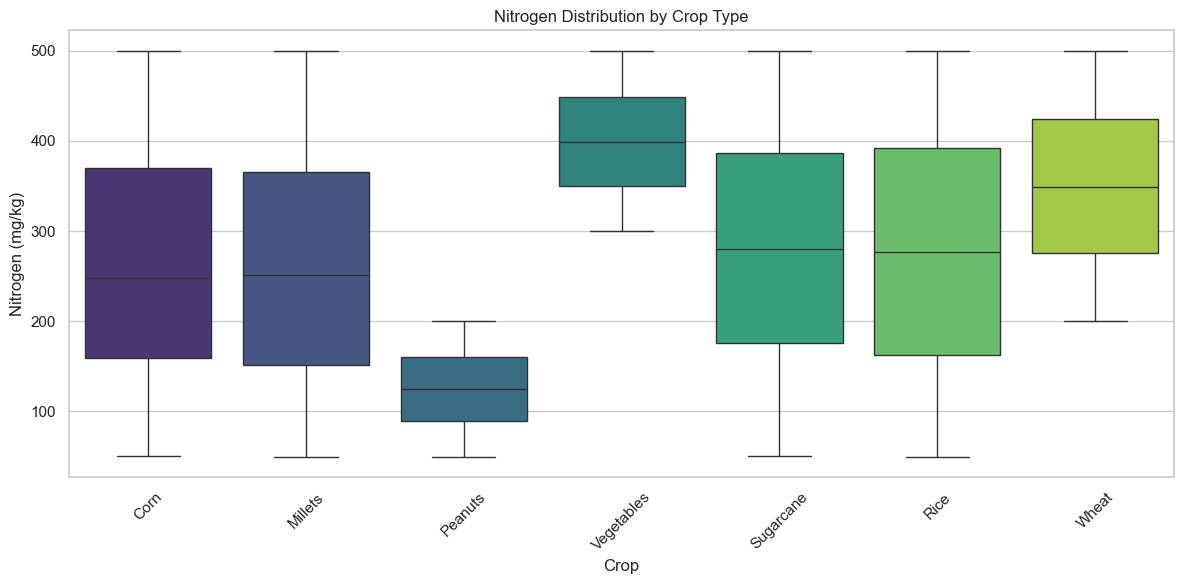

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.iloc[:, -1], y='pH_Level', data=df, palette='viridis')
plt.title('pH Level Distribution by Crop Type')
plt.xlabel('Crop')
plt.ylabel('pH Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df.iloc[:, -1], y='Nitrogen_mg_kg', data=df, palette='viridis')
plt.title('Nitrogen Distribution by Crop Type')
plt.xlabel('Crop')
plt.ylabel('Nitrogen (mg/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

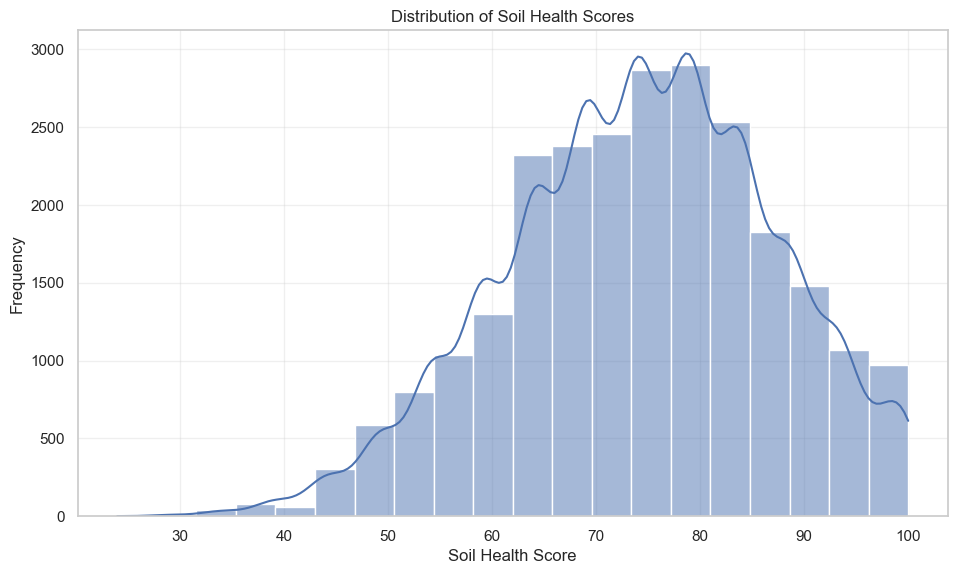

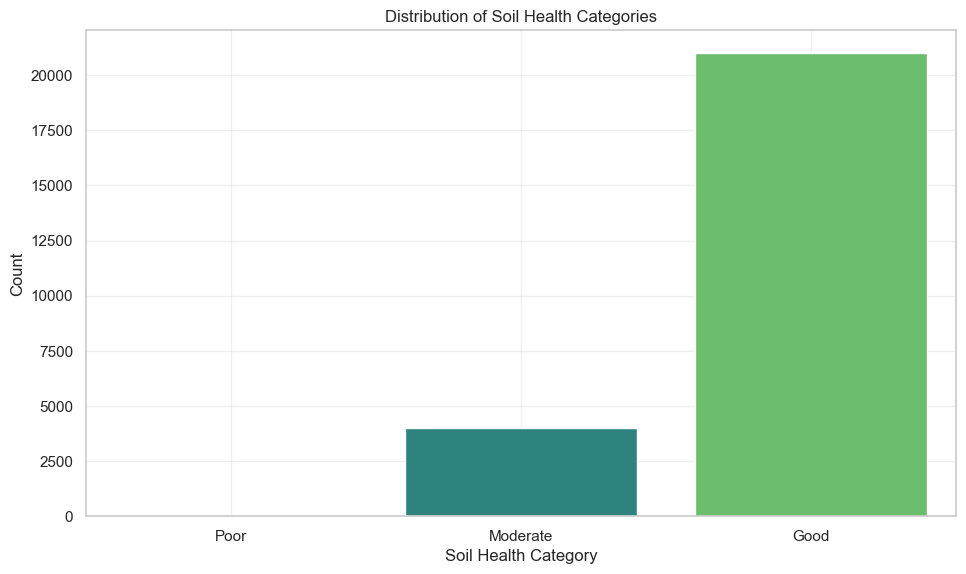

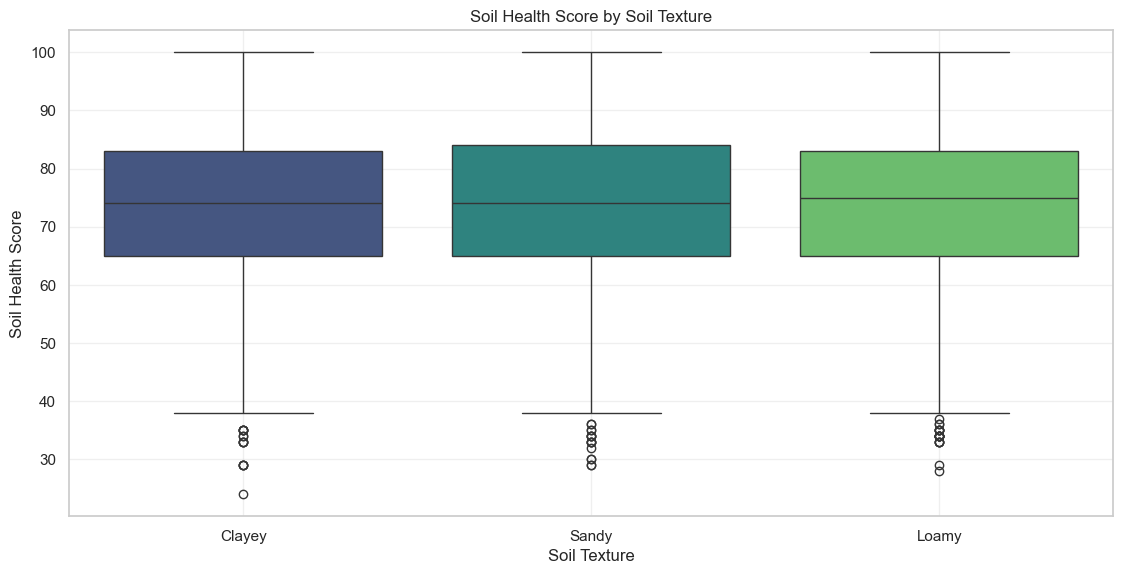

In [6]:
# Define a function to calculate soil health score
def calculate_soil_health_score(row):
    """
    Calculate soil health score based on key parameters.
    The score is on a scale of 0-100 with higher values indicating better soil health.
    """
    # Initialize base score
    score = 50
    
    # pH factor (optimal range 6.0-7.5)
    ph = row['pH_Level']
    if 6.0 <= ph <= 7.5:
        score += 10
    elif 5.5 <= ph < 6.0 or 7.5 < ph <= 8.0:
        score += 5
    else:
        score -= 5
    
    # Organic carbon (higher is generally better)
    oc = row['Organic_Carbon_%']
    if oc > 2.0:
        score += 10
    elif 1.0 <= oc <= 2.0:
        score += 5
    else:
        score -= 5
    
    # Nitrogen content
    n = row['Nitrogen_mg_kg']
    if n > 300:
        score += 7
    elif 150 <= n <= 300:
        score += 3
    else:
        score -= 3
    
    # Phosphorus content
    p = row['Phosphorus_mg_kg']
    if p > 25:
        score += 7
    elif 10 <= p <= 25:
        score += 3
    else:
        score -= 3
    
    # Potassium content
    k = row['Potassium_mg_kg']
    if k > 250:
        score += 7
    elif 150 <= k <= 250:
        score += 3
    else:
        score -= 3
    
    # Water holding capacity
    whc = row['Water_Holding_Capacity_%']
    if whc > 35:
        score += 6
    elif 20 <= whc <= 35:
        score += 3
    else:
        score -= 3
    
    # Electrical conductivity (optimal range 0.2-1.5)
    ec = row['Electrical_Conductivity_dS_m']
    if 0.2 <= ec <= 1.5:
        score += 5
    elif 1.5 < ec <= 2.5:
        score += 0
    else:
        score -= 5
    
    # Bulk density (lower is generally better for root growth)
    bd = row['Bulk_Density_g_cm3']
    if bd < 1.3:
        score += 5
    elif 1.3 <= bd <= 1.6:
        score += 0
    else:
        score -= 5
    
    # Porosity (higher is generally better)
    por = row['Porosity_%']
    if por > 45:
        score += 5
    elif 35 <= por <= 45:
        score += 0
    else:
        score -= 5
    
    # Limit score to range 0-100
    score = max(0, min(100, score))
    
    return score

# Add soil health score to the dataframe
df['Soil_Health_Score'] = df.apply(calculate_soil_health_score, axis=1)

# Categorize soil health
bins = [0, 30, 60, 100]
labels = ['Poor', 'Moderate', 'Good']
df['Soil_Health_Category'] = pd.cut(df['Soil_Health_Score'], bins=bins, labels=labels)

# Display soil health distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Soil_Health_Score'], kde=True, bins=20)
plt.title('Distribution of Soil Health Scores')
plt.xlabel('Soil Health Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Soil_Health_Category', data=df, palette='viridis')
plt.title('Distribution of Soil Health Categories')
plt.xlabel('Soil Health Category')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Visualize relationship between soil texture and soil health
plt.figure(figsize=(12, 6))
sns.boxplot(x='Soil_Texture', y='Soil_Health_Score', data=df, palette='viridis')
plt.title('Soil Health Score by Soil Texture')
plt.xlabel('Soil Texture')
plt.ylabel('Soil Health Score')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Feature selection for modeling
# We'll use all relevant soil parameters as features
feature_columns = [
    'Soil_Texture', 'Soil_Moisture_%', 'Bulk_Density_g_cm3', 
    'Porosity_%', 'Water_Holding_Capacity_%', 'pH_Level',
    'Electrical_Conductivity_dS_m', 'Organic_Carbon_%',
    'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg',
    'Sulfur_mg_kg'
]

# Define our features and targets
X = df[feature_columns].copy()
y_crop = df.iloc[:, -3]  # Crop column
y_soil_health = df['Soil_Health_Category']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

le_health = LabelEncoder()
y_soil_health_encoded = le_health.fit_transform(y_soil_health)

le_crop = LabelEncoder()
y_crop_encoded = le_crop.fit_transform(y_crop)

# Print mapping of encoded values
print("Soil Texture Encoding:")
for i, category in enumerate(label_encoders['Soil_Texture'].classes_):
    print(f"  {i}: {category}")
    
print("\nSoil Health Category Encoding:")
for i, category in enumerate(le_health.classes_):
    print(f"  {i}: {category}")
    
print("\nCrop Encoding:")
for i, category in enumerate(le_crop.classes_):
    print(f"  {i}: {category}")

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data for soil health classification
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X, y_soil_health_encoded, test_size=0.2, random_state=42
)

# Split the data for crop recommendation
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X, y_crop_encoded, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_health.shape[0]} samples")
print(f"Testing set size: {X_test_health.shape[0]} samples")

Soil Texture Encoding:
  0: Clayey
  1: Loamy
  2: Sandy

Soil Health Category Encoding:
  0: Good
  1: Moderate
  2: Poor

Crop Encoding:
  0: Corn
  1: Millets
  2: Peanuts
  3: Rice
  4: Sugarcane
  5: Vegetables
  6: Wheat

Training set size: 20000 samples
Testing set size: 5000 samples


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Create and train the soil health classification model (XGBoost)
print("Training soil health classification model...")
xgb_health = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_health.fit(X_train_health, y_train_health)

# Evaluate the soil health model
y_pred_health = xgb_health.predict(X_test_health)
health_accuracy = accuracy_score(y_test_health, y_pred_health)
print(f"Soil Health Classification Accuracy: {health_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test_health, y_pred_health, 
                          target_names=le_health.classes_))

# Feature importance for soil health
feature_importance_health = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_health.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_health)


Training soil health classification model...
Soil Health Classification Accuracy: 0.9666
Classification Report:
              precision    recall  f1-score   support

        Good       0.97      0.99      0.98      4219
    Moderate       0.96      0.82      0.88       778
        Poor       0.00      0.00      0.00         3

    accuracy                           0.97      5000
   macro avg       0.64      0.60      0.62      5000
weighted avg       0.97      0.97      0.97      5000

                         Feature  Importance
7               Organic_Carbon_%    0.176815
5                       pH_Level    0.134197
2             Bulk_Density_g_cm3    0.109272
10               Potassium_mg_kg    0.107927
8                 Nitrogen_mg_kg    0.099062
4       Water_Holding_Capacity_%    0.095636
3                     Porosity_%    0.086812
9               Phosphorus_mg_kg    0.078545
6   Electrical_Conductivity_dS_m    0.074664
11                  Sulfur_mg_kg    0.013258
1           

In [9]:
import pickle
import os

# Define export path
export_dir = 'ExportedModels'
export_filename = os.path.join(export_dir, 'SoilHealthModel.pkl')

# Create export directory if it doesn't exist
os.makedirs(export_dir, exist_ok=True)

# Export using pickle
print("Exporting Soil Health Classification Model...")
try:
    with open(export_filename, 'wb') as f:
        pickle.dump(xgb_health, f)
    print(f"✓ Model successfully exported to: {export_filename}")

except Exception as e:
    print(f"Error during export: {str(e)}")

# Instructions to load the model
print("\nYou can load this model with:")
print("import pickle")
print("with open('ExportedModels/SoilHealthModel.pkl', 'rb') as f:")
print("    soil_health_model = pickle.load(f)")


Exporting Soil Health Classification Model...
✓ Model successfully exported to: ExportedModels\SoilHealthModel.pkl

You can load this model with:
import pickle
with open('ExportedModels/SoilHealthModel.pkl', 'rb') as f:
    soil_health_model = pickle.load(f)



Most important features for soil health classification:
                         Feature  Importance
7               Organic_Carbon_%    0.176815
5                       pH_Level    0.134197
2             Bulk_Density_g_cm3    0.109272
10               Potassium_mg_kg    0.107927
8                 Nitrogen_mg_kg    0.099062
4       Water_Holding_Capacity_%    0.095636
3                     Porosity_%    0.086812
9               Phosphorus_mg_kg    0.078545
6   Electrical_Conductivity_dS_m    0.074664
11                  Sulfur_mg_kg    0.013258


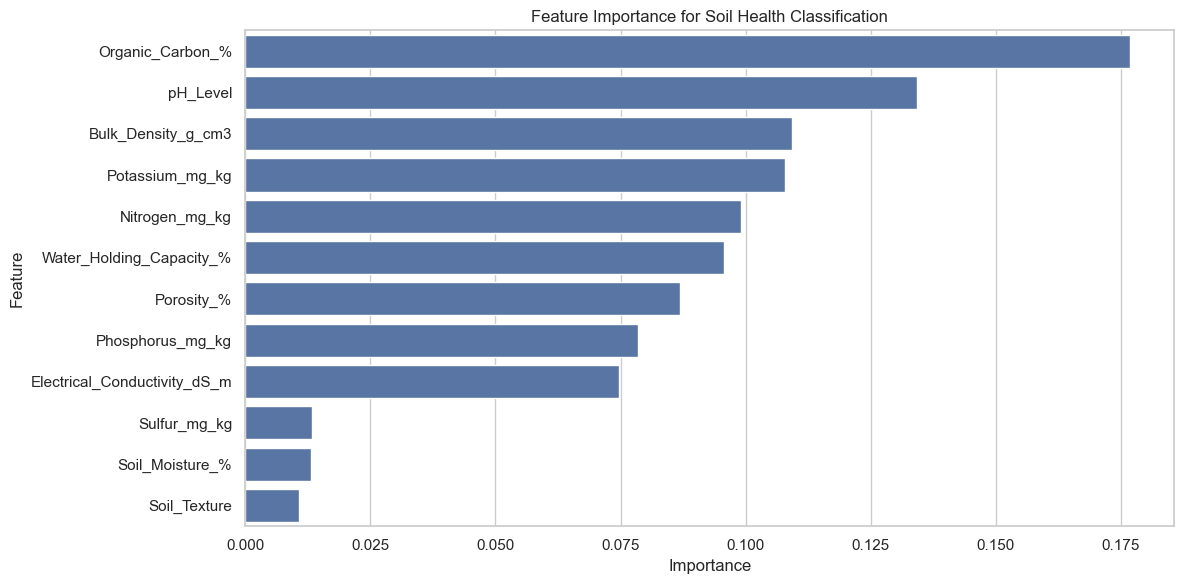

In [10]:
print("\nMost important features for soil health classification:")
print(feature_importance_health.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_health)
plt.title('Feature Importance for Soil Health Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Optimized XGBoost model for crop recommendation
print("Training optimized crop recommendation model...")
xgb_crop = XGBClassifier(
    n_estimators=300,        # More trees for better learning
    learning_rate=0.05,      # Lower learning rate for better convergence
    max_depth=8,             # Deeper trees for complex patterns
    subsample=0.8,           # Prevents overfitting
    colsample_bytree=0.8,    # Random feature selection for diversity
    gamma=0.1,               # Pruning to avoid overfitting
    reg_lambda=1,            # L2 regularization
    reg_alpha=0.5,           # L1 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_crop.fit(X_train_crop, y_train_crop)

y_pred_crop = xgb_crop.predict(X_test_crop)
crop_accuracy = accuracy_score(y_test_crop, y_pred_crop)
print(f"Crop Recommendation Accuracy: {crop_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test_crop, y_pred_crop, 
                          target_names=le_crop.classes_))

# Feature importance
feature_importance_crop = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_crop.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_crop)


Training optimized crop recommendation model...
Crop Recommendation Accuracy: 0.8824
Classification Report:
              precision    recall  f1-score   support

        Corn       0.90      0.92      0.91       216
     Millets       0.89      0.97      0.93      2991
     Peanuts       0.99      1.00      1.00       314
        Rice       0.95      0.99      0.97       169
   Sugarcane       0.36      0.13      0.19       506
  Vegetables       0.89      0.95      0.92       532
       Wheat       0.96      0.98      0.97       272

    accuracy                           0.88      5000
   macro avg       0.85      0.85      0.84      5000
weighted avg       0.85      0.88      0.86      5000

                         Feature  Importance
0                   Soil_Texture    0.302917
8                 Nitrogen_mg_kg    0.175492
7               Organic_Carbon_%    0.119090
1                Soil_Moisture_%    0.103056
5                       pH_Level    0.099128
10               Potassiu

In [12]:
# Export the Crop Recommendation Model
import pickle
import os

# Create export directory if it doesn't exist
os.makedirs('ExportedModels', exist_ok=True)

# Export with CamelCase naming
export_filename = 'ExportedModels/CropRecommendationModel.pkl'

# Simple export using pickle
print("Exporting Crop Recommendation Model...")
try:
    with open(export_filename, 'wb') as f:
        pickle.dump(xgb_crop, f)
    print(f"✓ Model successfully exported to: {export_filename}")
    
except Exception as e:
    print(f"Error during export: {str(e)}")

print("You can load this model with:")
print("import pickle")
print("with open('ExportedModels/CropRecommendationModel.pkl', 'rb') as f:")
print("    crop_recommendation_model = pickle.load(f)")

Exporting Crop Recommendation Model...
✓ Model successfully exported to: ExportedModels/CropRecommendationModel.pkl
You can load this model with:
import pickle
with open('ExportedModels/CropRecommendationModel.pkl', 'rb') as f:
    crop_recommendation_model = pickle.load(f)



Most important features for crop recommendation:
                         Feature  Importance
0                   Soil_Texture    0.302917
8                 Nitrogen_mg_kg    0.175492
7               Organic_Carbon_%    0.119090
1                Soil_Moisture_%    0.103056
5                       pH_Level    0.099128
10               Potassium_mg_kg    0.078028
9               Phosphorus_mg_kg    0.061643
3                     Porosity_%    0.012213
6   Electrical_Conductivity_dS_m    0.012126
11                  Sulfur_mg_kg    0.012117


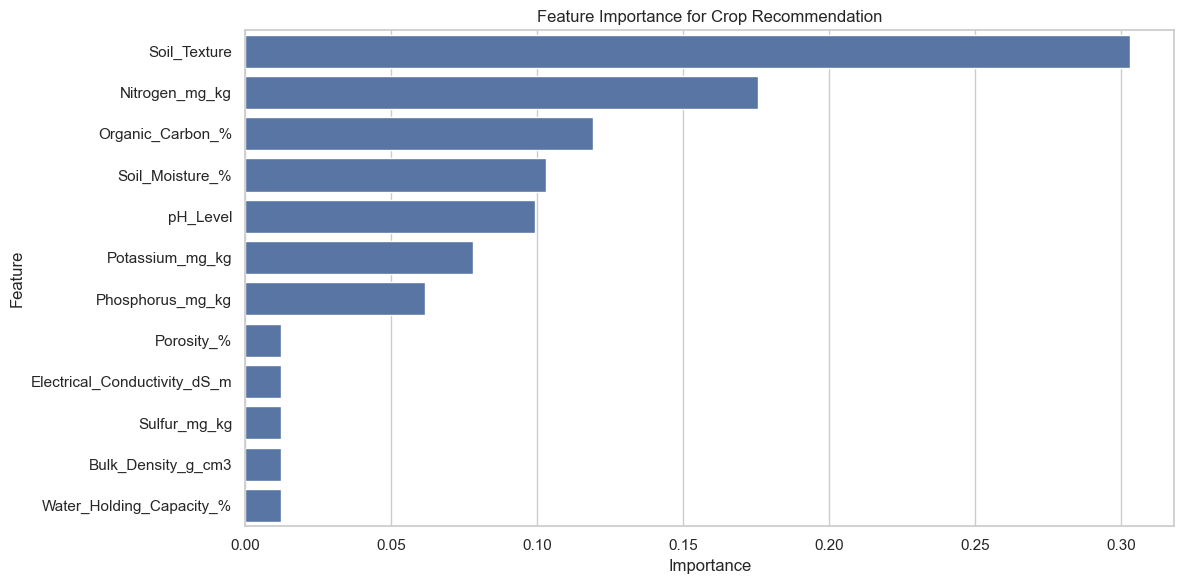

In [13]:
print("\nMost important features for crop recommendation:")
print(feature_importance_crop.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_crop)
plt.title('Feature Importance for Crop Recommendation')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [14]:
def recommend_fertilizer(soil_params):
    """
    Generate fertilizer recommendation based on soil parameters.
    
    Parameters:
    soil_params: dict with keys for soil nutrient levels and properties
    
    Returns:
    dict: Fertilizer recommendations
    """
    recommendations = {}
    
    # Extract parameters
    ph = soil_params.get('pH_Level', 7.0)
    nitrogen = soil_params.get('Nitrogen_mg_kg', 0)
    phosphorus = soil_params.get('Phosphorus_mg_kg', 0)
    potassium = soil_params.get('Potassium_mg_kg', 0)
    organic_carbon = soil_params.get('Organic_Carbon_%', 0)
    sulfur = soil_params.get('Sulfur_mg_kg', 0)
    
    # Nitrogen recommendation
    if nitrogen < 150:
        recommendations['Nitrogen'] = {
            'status': 'Low',
            'recommendation': 'Apply 120-150 kg/ha of Nitrogen through Urea (46% N) or Ammonium Sulfate (21% N)',
            'priority': 'High'
        }
    elif 150 <= nitrogen < 300:
        recommendations['Nitrogen'] = {
            'status': 'Medium',
            'recommendation': 'Apply 80-100 kg/ha of Nitrogen through Urea or Ammonium Nitrate',
            'priority': 'Medium'
        }
    else:
        recommendations['Nitrogen'] = {
            'status': 'Adequate',
            'recommendation': 'Maintain current levels with 40-60 kg/ha of Nitrogen',
            'priority': 'Low'
        }
    
    # Phosphorus recommendation
    if phosphorus < 10:
        recommendations['Phosphorus'] = {
            'status': 'Low',
            'recommendation': 'Apply 80-100 kg/ha of P2O5 through Single Superphosphate (16% P2O5) or Triple Superphosphate (46% P2O5)',
            'priority': 'High'
        }
    elif 10 <= phosphorus < 25:
        recommendations['Phosphorus'] = {
            'status': 'Medium',
            'recommendation': 'Apply 60-80 kg/ha of P2O5 through DAP (18% N, 46% P2O5)',
            'priority': 'Medium'
        }
    else:
        recommendations['Phosphorus'] = {
            'status': 'Adequate',
            'recommendation': 'Apply 40-50 kg/ha of P2O5 to maintain levels',
            'priority': 'Low'
        }
    
    # Potassium recommendation
    if potassium < 150:
        recommendations['Potassium'] = {
            'status': 'Low',
            'recommendation': 'Apply 80-120 kg/ha of K2O through Muriate of Potash (60% K2O) or Sulfate of Potash (50% K2O)',
            'priority': 'High'
        }
    elif 150 <= potassium < 250:
        recommendations['Potassium'] = {
            'status': 'Medium',
            'recommendation': 'Apply 60-80 kg/ha of K2O through Muriate of Potash',
            'priority': 'Medium'
        }
    else:
        recommendations['Potassium'] = {
            'status': 'Adequate',
            'recommendation': 'Apply 40-60 kg/ha of K2O to maintain levels',
            'priority': 'Low'
        }
    
    # Organic carbon recommendation
    if organic_carbon < 0.5:
        recommendations['Organic Matter'] = {
            'status': 'Very Low',
            'recommendation': 'Apply 10-15 tons/ha of well-decomposed FYM or compost. Include green manuring in crop rotation.',
            'priority': 'High'
        }
    elif 0.5 <= organic_carbon < 1.0:
        recommendations['Organic Matter'] = {
            'status': 'Low',
            'recommendation': 'Apply 8-10 tons/ha of compost or farmyard manure. Consider crop residue incorporation.',
            'priority': 'High'
        }
    elif 1.0 <= organic_carbon < 2.0:
        recommendations['Organic Matter'] = {
            'status': 'Medium',
            'recommendation': 'Apply 5-8 tons/ha of organic matter to maintain soil health',
            'priority': 'Medium'
        }
    else:
        recommendations['Organic Matter'] = {
            'status': 'Adequate',
            'recommendation': 'Maintain current practices with 3-5 tons/ha of organic inputs',
            'priority': 'Low'
        }
    
    # pH correction
    if ph < 5.5:
        recommendations['pH Correction'] = {
            'status': 'Acidic',
            'recommendation': 'Apply agricultural lime (CaCO3) at 2-4 tons/ha depending on soil texture',
            'priority': 'High'
        }
    elif ph > 8.0:
        recommendations['pH Correction'] = {
            'status': 'Alkaline',
            'recommendation': 'Apply gypsum (CaSO4·2H2O) at 1-2 tons/ha or incorporate organic matter to lower pH',
            'priority': 'High'
        }
    else:
        recommendations['pH Correction'] = {
            'status': 'Optimal',
            'recommendation': 'No pH correction needed',
            'priority': 'Low'
        }
    
    # Sulfur recommendation
    if sulfur < 10:
        recommendations['Sulfur'] = {
            'status': 'Low',
            'recommendation': 'Apply 25-30 kg/ha of Sulfur through Ammonium Sulfate or Gypsum',
            'priority': 'Medium'
        }
    elif 10 <= sulfur < 20:
        recommendations['Sulfur'] = {
            'status': 'Medium',
            'recommendation': 'Apply 15-20 kg/ha of Sulfur through Sulfate fertilizers',
            'priority': 'Low'
        }
    else:
        recommendations['Sulfur'] = {
            'status': 'Adequate',
            'recommendation': 'No additional Sulfur required',
            'priority': 'Low'
        }
    
    return recommendations

In [15]:
# 7. Irrigation Recommendation System

def recommend_irrigation(soil_params, crop_type):
    """
    Generate irrigation recommendation based on soil parameters and crop type.
    
    Parameters:
    soil_params: dict with keys for soil properties
    crop_type: string indicating the crop being grown
    
    Returns:
    dict: Irrigation recommendations including frequency, method and water requirements
    """
    # Extract relevant parameters
    soil_texture = soil_params.get('Soil_Texture', 'Loamy')
    soil_moisture = soil_params.get('Soil_Moisture_%', 20)
    water_holding_capacity = soil_params.get('Water_Holding_Capacity_%', 30)
    
    recommendations = {}
    
    # Base recommendations on soil texture
    if soil_texture == 'Sandy':
        recommendations['water_retention'] = 'Low'
        recommendations['drainage'] = 'Rapid'
        recommendations['frequency'] = 'Frequent (2-3 days)'
        recommendations['amount_per_irrigation'] = 'Light (15-20 mm)'
        recommendations['irrigation_efficiency'] = 'Use drip irrigation to minimize water loss'
    elif soil_texture == 'Clayey':
        recommendations['water_retention'] = 'High'
        recommendations['drainage'] = 'Slow'
        recommendations['frequency'] = 'Less frequent (7-10 days)'
        recommendations['amount_per_irrigation'] = 'Heavy (30-40 mm)'
        recommendations['irrigation_efficiency'] = 'Use furrow irrigation with proper drainage'
    else:  # Loamy
        recommendations['water_retention'] = 'Medium'
        recommendations['drainage'] = 'Moderate'
        recommendations['frequency'] = 'Moderate (4-6 days)'
        recommendations['amount_per_irrigation'] = 'Medium (20-30 mm)'
        recommendations['irrigation_efficiency'] = 'Sprinkler or drip irrigation recommended'
    
    # Adjust for current soil moisture
    if soil_moisture < 10:
        recommendations['immediate_action'] = 'Soil is very dry. Irrigate immediately.'
        recommendations['frequency'] = 'Increase frequency temporarily'
    elif soil_moisture > 35:
        recommendations['immediate_action'] = 'Soil is adequately moist. Delay irrigation.'
        recommendations['caution'] = 'Monitor for waterlogging, especially in clayey soils'
    
    # Crop-specific recommendations
    crop_specific = {}
    
    if crop_type == 'Rice':
        crop_specific = {
            'water_requirement': 'High (1200-1500 mm per season)',
            'critical_stages': 'Transplanting, tillering, panicle initiation, flowering',
            'special_recommendation': 'Maintain standing water (5-7 cm) during critical growth stages'
        }
    elif crop_type in ['Wheat', 'Corn']:
        crop_specific = {
            'water_requirement': 'Medium (400-600 mm per season)',
            'critical_stages': 'Crown root initiation, tillering, flowering, grain filling',
            'special_recommendation': 'Ensure adequate moisture during flowering and grain filling'
        }
    elif crop_type == 'Vegetables':
        crop_specific = {
            'water_requirement': 'Medium-High (500-700 mm per season)',
            'critical_stages': 'Seedling establishment, flowering, fruit development',
            'special_recommendation': 'Maintain consistent soil moisture to prevent cracking/splitting of produce'
        }
    elif crop_type in ['Millets', 'Peanuts']:
        crop_specific = {
            'water_requirement': 'Low-Medium (300-500 mm per season)',
            'critical_stages': 'Flowering, grain development',
            'special_recommendation': 'These crops are drought-tolerant; avoid over-irrigation'
        }
    elif crop_type == 'Sugarcane':
        crop_specific = {
            'water_requirement': 'Very High (1500-2500 mm per season)',
            'critical_stages': 'Germination, tillering, grand growth, maturity',
            'special_recommendation': 'Ensure adequate drainage to prevent waterlogging'
        }
    
    recommendations.update({'crop_specific': crop_specific})
    
    # Add water conservation techniques based on water holding capacity
    if water_holding_capacity < 20:
        recommendations['water_conservation'] = [
            'Apply mulching to reduce evaporation',
            'Use organic amendments to improve soil structure and water retention',
            'Consider deficit irrigation during non-critical growth stages'
        ]
    
    return recommendations

In [16]:
# 8. Integration: Comprehensive Agricultural Management System

def generate_comprehensive_recommendations(soil_data, crop=None):
    """
    Generate comprehensive agricultural management recommendations.
    
    Parameters:
    soil_data: dict with soil test results
    crop: string indicating crop (optional)
    
    Returns:
    dict: Comprehensive recommendations
    """
    recommendations = {}
    
    # 1. Determine soil health category
    soil_health_score = calculate_soil_health_score(soil_data)
    if soil_health_score < 30:
        soil_health_category = 'Poor'
    elif soil_health_score < 60:
        soil_health_category = 'Moderate'
    else:
        soil_health_category = 'Good'
    
    recommendations['soil_health'] = {
        'score': soil_health_score,
        'category': soil_health_category,
        'interpretation': f"Your soil health score is {soil_health_score}/100, which is categorized as {soil_health_category}."
    }
    
    # 2. Add fertilizer recommendations
    recommendations['fertilizer'] = recommend_fertilizer(soil_data)
    
    # 3. Crop recommendation if not provided
    if crop is None:
        # Prepare data for model prediction
        # Need to transform soil_data to match the model's expected input format
        input_data = pd.DataFrame([soil_data])
        
        # Handle categorical variables and scaling
        if 'Soil_Texture' in input_data.columns:
            # Encode soil texture using the same encoding as training
            input_data['Soil_Texture'] = label_encoders['Soil_Texture'].transform([input_data['Soil_Texture'].iloc[0]])[0]
        
        # Scale numerical features
        numerical_features = input_data.select_dtypes(include=['float64', 'int64']).columns
        input_data[numerical_features] = scaler.transform(input_data[numerical_features])
        
        # Predict crop
        crop_encoded = xgb_crop.predict(input_data)[0]
        crop = le_crop.inverse_transform([crop_encoded])[0]
        
        recommendations['crop'] = {
            'recommended_crop': crop,
            'confidence': f"Model confidence in this recommendation: {max(xgb_crop.predict_proba(input_data)[0])*100:.1f}%",
            'alternatives': ', '.join(le_crop.inverse_transform(np.argsort(-xgb_crop.predict_proba(input_data)[0])[1:4]))
        }
    else:
        recommendations['crop'] = {
            'selected_crop': crop,
            'note': "Using user-selected crop for generating recommendations."
        }
    
    # 4. Add irrigation recommendations based on crop and soil
    recommendations['irrigation'] = recommend_irrigation(soil_data, crop)
    
    # 5. Provide soil improvement strategies based on soil health score
    if soil_health_category == 'Poor':
        recommendations['soil_improvement'] = {
            'priority': 'High',
            'strategies': [
                'Incorporate organic matter (compost, manure) at 15-20 tons/ha',
                'Practice crop rotation with leguminous cover crops',
                'Consider green manuring to improve soil structure and fertility',
                'Apply recommended soil amendments to correct pH and nutrient deficiencies',
                'Minimize tillage to reduce soil disturbance and erosion'
            ]
        }
    elif soil_health_category == 'Moderate':
        recommendations['soil_improvement'] = {
            'priority': 'Medium',
            'strategies': [
                'Continue adding organic matter at 8-10 tons/ha',
                'Implement crop rotation with focus on soil-building crops',
                'Consider reduced tillage practices',
                'Address specific nutrient deficiencies as identified in soil test'
            ]
        }
    else:  # Good
        recommendations['soil_improvement'] = {
            'priority': 'Low',
            'strategies': [
                'Maintain current soil management practices',
                'Monitor soil health through regular testing',
                'Continue crop rotation and organic matter addition'
            ]
        }
    
    return recommendations

In [17]:
# 9. Model Deployment and Testing

import random

# Define a function to randomize within reasonable ranges
def randomize_value(base_value, variation_percent=15):
    variation = base_value * (variation_percent / 100)
    return round(random.uniform(base_value - variation, base_value + variation), 2)

# Let's test our system with a randomized soil input
sample_soil = {
    'Soil_Texture': random.choice(['Loamy', 'Clayey', 'Sandy']),
    'Soil_Moisture_%': randomize_value(22.5, 30),
    'Bulk_Density_g_cm3': randomize_value(1.4, 15),
    'Porosity_%': randomize_value(42.0, 20),
    'Water_Holding_Capacity_%': randomize_value(35.0, 25),
    'pH_Level': randomize_value(6.8, 20),
    'Electrical_Conductivity_dS_m': randomize_value(0.8, 40),
    'Organic_Carbon_%': randomize_value(1.5, 40),
    'Nitrogen_mg_kg': randomize_value(220.0, 35),
    'Phosphorus_mg_kg': randomize_value(15.0, 50),
    'Potassium_mg_kg': randomize_value(180.0, 30),
    'Sulfur_mg_kg': randomize_value(18.0, 40)
}

print("Randomized soil sample for testing:")
for param, value in sample_soil.items():
    print(f"  {param}: {value}")

# Generate comprehensive recommendations
comprehensive_recommendations = generate_comprehensive_recommendations(sample_soil)

# Display the recommendations
print("\nCOMPREHENSIVE AGRICULTURAL RECOMMENDATIONS")
print("=" * 50)

# Soil Health Summary
print(f"\nSOIL HEALTH ASSESSMENT:")
print(f"  Score: {comprehensive_recommendations['soil_health']['score']}")
print(f"  Category: {comprehensive_recommendations['soil_health']['category']}")
print(f"  {comprehensive_recommendations['soil_health']['interpretation']}")

# Crop Recommendation
print(f"\nRECOMMENDED CROP:")
if 'recommended_crop' in comprehensive_recommendations['crop']:
    print(f"  Primary Recommendation: {comprehensive_recommendations['crop']['recommended_crop']}")
    print(f"  {comprehensive_recommendations['crop']['confidence']}")
    print(f"  Alternative Crops: {comprehensive_recommendations['crop']['alternatives']}")
else:
    print(f"  Selected Crop: {comprehensive_recommendations['crop']['selected_crop']}")
    print(f"  {comprehensive_recommendations['crop']['note']}")

# Fertilizer Recommendations
print(f"\nFERTILIZER RECOMMENDATIONS:")
for nutrient, info in comprehensive_recommendations['fertilizer'].items():
    print(f"  {nutrient} ({info['status']} - {info['priority']} Priority):")
    print(f"    {info['recommendation']}")

# Irrigation Recommendations
print(f"\nIRRIGATION PLAN:")
irr = comprehensive_recommendations['irrigation']
print(f"  Soil Water Retention: {irr['water_retention']}")
print(f"  Drainage: {irr['drainage']}")
print(f"  Recommended Frequency: {irr['frequency']}")
print(f"  Amount per Irrigation: {irr['amount_per_irrigation']}")
print(f"  Efficiency Tip: {irr['irrigation_efficiency']}")

if 'immediate_action' in irr:
    print(f"  Immediate Action: {irr['immediate_action']}")

print(f"\n  CROP-SPECIFIC IRRIGATION:")
crop_irr = irr['crop_specific']
print(f"    Water Requirement: {crop_irr['water_requirement']}")
print(f"    Critical Stages: {crop_irr['critical_stages']}")
print(f"    Special Note: {crop_irr['special_recommendation']}")

if 'water_conservation' in irr:
    print(f"\n  WATER CONSERVATION TIPS:")
    for tip in irr['water_conservation']:
        print(f"    - {tip}")

# Soil Improvement Strategies
print(f"\nSOIL IMPROVEMENT STRATEGIES ({comprehensive_recommendations['soil_improvement']['priority']} Priority):")
for strategy in comprehensive_recommendations['soil_improvement']['strategies']:
    print(f"  - {strategy}")

Randomized soil sample for testing:
  Soil_Texture: Loamy
  Soil_Moisture_%: 28.53
  Bulk_Density_g_cm3: 1.61
  Porosity_%: 39.46
  Water_Holding_Capacity_%: 26.4
  pH_Level: 7.58
  Electrical_Conductivity_dS_m: 0.56
  Organic_Carbon_%: 1.98
  Nitrogen_mg_kg: 212.3
  Phosphorus_mg_kg: 22.45
  Potassium_mg_kg: 200.25
  Sulfur_mg_kg: 23.39

COMPREHENSIVE AGRICULTURAL RECOMMENDATIONS

SOIL HEALTH ASSESSMENT:
  Score: 72
  Category: Good
  Your soil health score is 72/100, which is categorized as Good.

RECOMMENDED CROP:
  Primary Recommendation: Millets
  Model confidence in this recommendation: 99.9%
  Alternative Crops: Wheat, Sugarcane, Rice

FERTILIZER RECOMMENDATIONS:
  Nitrogen (Medium - Medium Priority):
    Apply 80-100 kg/ha of Nitrogen through Urea or Ammonium Nitrate
  Phosphorus (Medium - Medium Priority):
    Apply 60-80 kg/ha of P2O5 through DAP (18% N, 46% P2O5)
  Potassium (Medium - Medium Priority):
    Apply 60-80 kg/ha of K2O through Muriate of Potash
  Organic Matter (